In [2]:
# Importing necessary libraries
import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16, VGG19, ResNet50, InceptionV3, Xception
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

# Setting random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Define constants
NUM_CLASSES = 2
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
TRAIN_DIR = 'train'
VAL_DIR = 'val'
TEST_DIR = 'test'
TRAIN_SPLIT = 0.7
VAL_SPLIT = 0.1
TEST_SPLIT = 0.2
test_samples = 280

In [3]:
# Define the base directory where the image data is located
BASE_DIR = r"C:\Users\mohit\Downloads\DIP Assignment 2\Data"

In [4]:
# Set the paths for training, validation, and test data
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VAL_DIR = os.path.join(BASE_DIR, 'val')
TEST_DIR = os.path.join(BASE_DIR, 'test')

In [5]:
# Load and preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,target_size=IMG_SIZE,batch_size=BATCH_SIZE,class_mode='categorical')

val_generator = val_datagen.flow_from_directory(VAL_DIR,target_size=IMG_SIZE,batch_size=BATCH_SIZE,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMG_SIZE,batch_size=BATCH_SIZE,class_mode='categorical',shuffle=False)

Found 980 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


In [8]:
# Define function for creating transfer learning models
def create_transfer_model(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Define ResNet50 model
resnet50_base = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
resnet50_base.trainable = False
resnet50_model = create_transfer_model(resnet50_base, NUM_CLASSES)
resnet50_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [9]:
# Compile the models
optimizer = Adam(learning_rate=0.0001)
resnet50_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Define checkpoint callback to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [11]:
# Train the models
resnet50_history = resnet50_model.fit_generator(train_generator, steps_per_epoch=train_generator.n // train_generator.batch_size, epochs=4, validation_data=val_generator, validation_steps=val_generator.n // val_generator.batch_size, callbacks=[checkpoint])

C:\Users\mohit\AppData\Local\Temp\ipykernel_34780\1868370344.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resnet50_history = resnet50_model.fit_generator(train_generator, steps_per_epoch=train_generator.n // train_generator.batch_size, epochs=4, validation_data=val_generator, validation_steps=val_generator.n // val_generator.batch_size, callbacks=[checkpoint])


Epoch 1/4
30/30 [==============================] - 55s 2s/step - loss: 0.7525 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5078
Epoch 2/4
30/30 [==============================] - 38s 1s/step - loss: 0.6873 - accuracy: 0.5316 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 3/4
30/30 [==============================] - 38s 1s/step - loss: 0.7027 - accuracy: 0.4905 - val_loss: 0.7059 - val_accuracy: 0.5156
Epoch 4/4
30/30 [==============================] - 40s 1s/step - loss: 0.6849 - accuracy: 0.5411 - val_loss: 0.6734 - val_accuracy: 0.6484


In [12]:
# Evaluate the models on test data
resnet50_scores = resnet50_model.evaluate_generator(test_generator, steps=test_samples // BATCH_SIZE)
print("ResNet50 Test Loss:", resnet50_scores[0])
print("ResNet50 Test Accuracy:", resnet50_scores[1])

C:\Users\mohit\AppData\Local\Temp\ipykernel_34780\556035509.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  resnet50_scores = resnet50_model.evaluate_generator(test_generator, steps=test_samples // BATCH_SIZE)


ResNet50 Test Loss: 0.6703158617019653
ResNet50 Test Accuracy: 0.66796875


In [13]:
# Get the number of test samples
num_test_samples = test_generator.n

# Calculate the number of steps for prediction
num_prediction_steps = num_test_samples // test_generator.batch_size + 1

# Generate predictions for all test samples
resnet50_predictions = resnet50_model.predict_generator(test_generator, steps=num_prediction_steps, verbose=1)

# Convert predictions to class labels
resnet50_predicted_labels = np.argmax(resnet50_predictions, axis=1)

C:\Users\mohit\AppData\Local\Temp\ipykernel_34780\2677680890.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  resnet50_predictions = resnet50_model.predict_generator(test_generator, steps=num_prediction_steps, verbose=1)


9/9 [==============================] - 9s 938ms/step


In [14]:
# Get true class labels
true_labels = test_generator.classes

In [15]:
# Calculate classification report
from sklearn.metrics import classification_report

# Get the ground truth labels
ground_truth_labels = test_generator.classes

# Get the predicted labels
resnet50_predicted_labels = np.argmax(resnet50_predictions, axis=1)

# Calculate classification report
classification_report_resnet50 = classification_report(ground_truth_labels, resnet50_predicted_labels, zero_division=1)

In [16]:
print("ResNet50 Classification Report:")
print(classification_report_resnet50)

ResNet50 Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.99      0.73       140
           1       0.98      0.29      0.44       140

    accuracy                           0.64       280
   macro avg       0.78      0.64      0.59       280
weighted avg       0.78      0.64      0.59       280



Epoch 1/4
30/30 [==============================] - 33s 1s/step - loss: 0.6784 - accuracy: 0.5686
Epoch 2/4
30/30 [==============================] - 34s 1s/step - loss: 0.6716 - accuracy: 0.6108
Epoch 3/4
30/30 [==============================] - 37s 1s/step - loss: 0.6632 - accuracy: 0.6783
Epoch 4/4
30/30 [==============================] - 40s 1s/step - loss: 0.6599 - accuracy: 0.5886


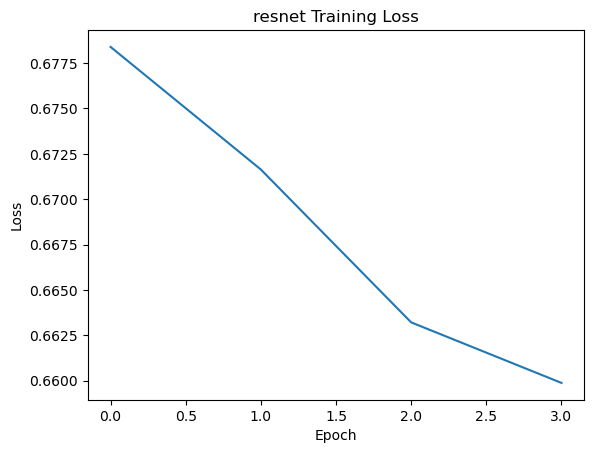

In [17]:
 import matplotlib.pyplot as plt

# Train the VGG16 model and obtain the training history
resnet50_history = resnet50_model.fit(train_generator, steps_per_epoch=train_generator.n // train_generator.batch_size, epochs=4)

# Plot the training loss curve
plt.plot(resnet50_history.history['loss'])
plt.title('resnet Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

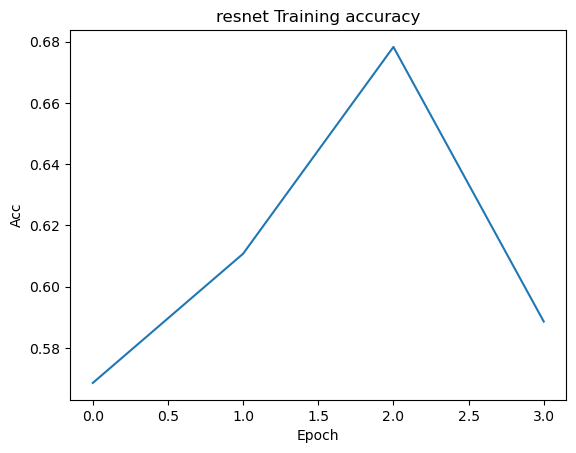

In [18]:
# Plot the training loss curve
plt.plot(resnet50_history.history['accuracy'])
plt.title('resnet Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.show()